# CA1

Scenario: 

You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The dataset’s  positive class consists of component failures for a specific component of the APS system.

The negative class consists of trucks with failures for components not related to the APS. The data consists  of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year.

All data wrangling, analysis, and visualizations must generated using python.

The companies CTO also requires you to rationalize all the decisions that you have made in your report.

Minimum Requirements 

You are required to use the dataset contained within the file “aps_failure_set.csv”, conduct the following analysis and report on your findings:

Characterization of the data set: size; number of attributes; has/does not have missing values, number of observations etc.

Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.
Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.
Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward.
Conclusions, Findings of data set and references (HARVARD style).
Note that all written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this).

All Code must be included in code blocks (As normal). No other upload will be accepted.

All written work MUST be detailed in your Jupyter Markdown (NOT in code comments).



# Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward.

The Curse of Dimensionality occurs when it is hard to get meaningful patterns within the data due its large number of features (dimensions). The analysis may be affected by different reasons, two of them are:
- the amount of time that the algorithms have to process high-dimensional data;
- the amount of noise surpassing the significant patterns, causing the phenomenal called overfitting and impacting on the generalisation of the model;

# IMORTING LIBRARIES

In [147]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

import sklearn.preprocessing as preproc

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer 

from sklearn.decomposition import PCA

from sklearn import preprocessing

from sklearn.model_selection import train_test_split 

In [110]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


# EDA

Exploratory Data Analysis. 

After importing the necessary libraries the next step is to do the Exploratory Data Analysis in our raw data to check its characteristics, such as: the size, shape, which kind of features and observations they are, if there are any missing or duplicated values and what kind of distribution it is. EDA was originally developed in 1970 by the American mathematician John Tukey (ibm, 2023). 

This is a crucial task because it is the one that helps us to understand what we are dealing with and which approach we are going to use next to obtain a good accuracy for the Machine Learning Model applied and get effective results. 



In [3]:
ca1 = pd.read_csv("aps_failure_set.csv")

In [4]:
ca1.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [5]:
ca1.shape

(60000, 171)

The shape of our dataset tells us that we have 60,000 observations distributed into 171 features. Some questions can be made in this point: 
- Is there any missing or duplicated values within the observations?;
- Are all the independent variables important to explain the target variable?

We need to keep exploring our raw data to answer those and other questions. 

In [6]:
ca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


The function .info() shows us that something is wrong with our observations. We know that all of our independent variables should be classified as numbers (int64 or float64) by the description of our dataset. Early when we looked at the head we saw a lot of numbers and some "na" observations. All the features are being considered as objects which means these "na" are strings, that is the reason why we are going to see that apparently we do not have any missing values in our dataset.

In [7]:
ca1.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

As written above, no missing values were found because all the independent variables are considered as objects. The following steps will include substituting all the "na" strings for the special value "NaN", counting the missing values and testing which is going to be the best way to deal with them.


In [8]:
ca1.describe(include = "object")

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


# MAYBE THIS DATASET IS SPARSE, SO WE DO NOT CENTRE

From the 20 columns out of 171 that we can see in these descriptions in two we can see the occurrence of "na". In the "ab_000" column 77.21% of all observations are "na" and in the "ad_000" 24.76%. It could be problematic if this is a constant in the structure of our dataset because the amount of missing values is high and significant information might be lost if it is not properly dealt with. Another observation is the frequency of the value 0 across all the features which indicates that the dataset is sparse. 


<Axes: xlabel='class', ylabel='Count'>

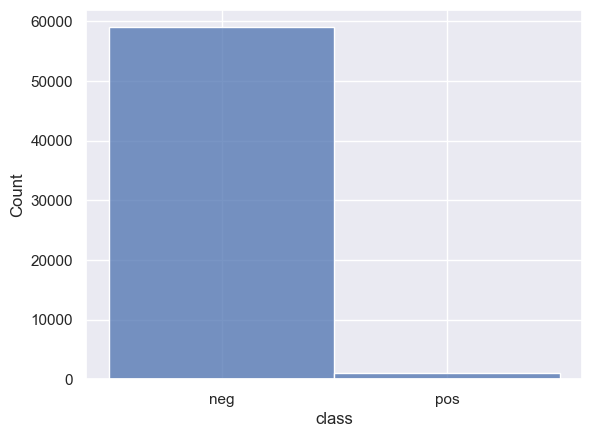

In [9]:
sns.histplot(data = ca1, x = "class")

By plotting this graphic of the target variable "class" we can see that the amount of failures for components not related to the APS system is significantly superior to the ones related to the APS. It is important to check the distribution to base futures decisions on the EDA, for example on dealing with the missing variables. 

Another question raised from the analysis of this graphic is: "how to deal with the bias on the target variable?". The difference between the two classes are so strong that it may be necessary to balance the dataset so the accuracy can be more trustworthy. A higher accuracy in this case might be misleading given the bias. The imbalance of the dataset can cause an overfitting in the Machine Learning Model when the minority class tends to be ignored over the majority (Truong). 

The application of SMOTE (Synthetic Minority Oversampling Technique), where the dataset is balanced by the creation of synthetic samples of the minority class (SATPATHY) can be a solution for this problem or undersampling techniques such as Near-miss that eliminate the majority class observations by random in order to balance the dataset (Imarticus).


In [10]:
ca1.duplicated().sum()

0

In [11]:
miss_vals = ["na"]

Defining that all missing values are "na"

In [12]:
ca1 = pd.read_csv("aps_failure_set.csv", na_values = miss_vals)

Substituting all missing values for the special value NaN so the columns can be counted as numbers (float or int64) and not objects as before.


In [13]:
ca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


The only object column is the "class" where the target variable is held.


In [111]:
ca1.describe()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,0.016667,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,0.128020,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,0.000000,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,1.000000,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


"Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories)." (Brownlee)

In [16]:
ca1['class'].replace('neg', 0, inplace = True)
ca1['class'].replace('pos', 1, inplace = True)

In [17]:
ca1.isnull().sum().head(3)

class         0
aa_000        0
ab_000    46329
dtype: int64

In [113]:
ca1.head(50)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,0,38312,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,0,14,0.0,6.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,102960,NaN,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,0,78696,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,1,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


Now that the substitutions were made we can have a clearer picture of our dataset and start the experiments and decide which is going to be the best way to deal with it.

The maximum number of columns that it is shown is 50. The idea is to check all the columns to see if it is important to keep all of them when replacing the missing variables. As we saw above some features have more than 70% of observations missing. Is it important to keep those columns? If we replace this high amount of missing values with one of the measures of central tendency or another technique will we input bias to the dataset? In order to answer those questions that have arisen from this step of the EDA it is necessary to do some experiments and analyse which method is the best choice.


There are three classes of Missing Data (Kaiser, 2014):

- Missing Completely at Random: in this case the observed data or the missing data do not impact on the occurrence of a record having missing values. For example when the data is lost in a laboratory due an accident while conducting the research. 

- Missing at Random: while in the previous class the observed data does not have an impact, in this case it does, the difference is that the probability of having a missing value is not impacted by the missing value itself. It might happen when the researcher does not get the information required, for example in a questionnaire where salary is one of the questions the missing values could be from the ones that earn more tend to be more reluctant to answer. 

- Not Missing at Random: According to (Stef van Buuren, 2018), this is the most complex case when the reasons why the values are missing are not known. One of the reasons could be the instruments in a laboratory are not working effectively and the researcher does not notice it.

Unfortunately for this project will not be possible to verify why those data are missing, 





# Counting the number of Columns with high number of missing values

In [132]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_50 = nperc[nperc > 50]

print(more_than_50)

ab_000    77.215000
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [19]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_40 = nperc[nperc > 40]

print(more_than_40)

ab_000    77.215000
bl_000    45.461667
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [20]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_30 = nperc[nperc > 30]

print(more_than_30)

ab_000    77.215000
bk_000    38.390000
bl_000    45.461667
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [21]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

less_than_30 = nperc[nperc < 30]

print(less_than_30)

class      0.000000
aa_000     0.000000
ac_000     5.558333
ad_000    24.768333
ae_000     4.166667
            ...    
ee_007     1.118333
ee_008     1.118333
ee_009     1.118333
ef_000     4.540000
eg_000     4.538333
Length: 161, dtype: float64


8 columns with more than 50% of the values null (4,67%)

9 columns with more than 40% of the values null (5,26%)

10 columns with more than 30% of the values null (5,84%)

# DROPPING MISSING VALUES 

The first experiment with the missing values. How will the dataset look like if all the missing values are dropped? How much information will be lost? Is this the better way to deal with it?


In [29]:
test1 = ca1.dropna(axis = 0)

Dropping all the missing values on the rows.

In [30]:
test1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,0,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,0,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,0,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,1,281324,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,1,43482,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0


In [31]:
class_test1 = test1[["class"]]

class_test1.head(2)

,class
16,0
179,0


In [32]:
class_test1.reset_index(inplace = True)

In [33]:
class_test1.head(2)

,index,class
0,16,0
1,179,0


In [34]:
class_test1.drop(["index"], axis = 1, inplace = True)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_6911/877355692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_test1.drop(["index"], axis = 1, inplace = True)


In [35]:
class_test1.head(2)

,class
0,0
1,0


In [36]:
class_test1.value_counts()

class
0        515
1         76
dtype: int64

In [37]:
class_test1.shape

(591, 1)

Target variable from the dataset without the missing values.

The amount of missing values is so massive that the remaining dataset will have only 591 rows (0.985%) after removing all the rows with missing values, losing 99.015% of the original dataset. This is a huge loss of information and can be impacted negatively in the Machine Learning Model. Further in the analysis I will compare the results of models excluding the missing values with the ones where I replaced them. 



# SPLITTING THE DATASET 

Splitting the dataset in y (target variable) and X (independent variables) to simplify the next steps.

In [140]:
class_ca1 = ca1[["class"]]

class_ca1.head(2)

,class
0,0
1,0


In [141]:
ca1_split = ca1.drop(["class"], axis = 1)

ca1_split.head(2)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0


In [142]:
X = ca1_split

y = class_ca1

In [143]:
y.value_counts()

class
0        59000
1         1000
dtype: int64

In [161]:
value_to_count = 0

mask = ca1_split.applymap(lambda x: x == value_to_count)

frequency = mask.sum()

is0 = (frequency / (len(ca1))) * 100

more_50 = is0[is0 > 50]

mt50 = pd.DataFrame(more_50)

more_50.describe()


count    56.000000
mean     88.128512
std      14.225078
min      51.681667
25%      78.962500
50%      96.233333
75%      99.091250
max      99.983333
dtype: float64

In [164]:
more_50.head(56)

ab_000    95.510000
ae_000    96.738333
af_000    96.626667
ag_000    99.673333
ag_001    98.763333
ag_002    94.753333
ag_003    79.275000
ag_009    68.948333
ai_000    90.361667
aj_000    79.246667
ak_000    99.378333
al_000    63.525000
am_0      63.206667
ar_000    96.085000
as_000    99.965000
at_000    90.040000
au_000    99.898333
ay_000    99.053333
ay_001    98.105000
ay_002    98.055000
ay_003    97.915000
ay_004    96.381667
ay_005    51.681667
ay_009    99.100000
az_007    76.275000
az_008    91.488333
az_009    96.860000
ba_009    67.178333
ch_000    99.983333
cj_000    79.100000
cl_000    77.233333
cn_000    96.645000
cn_001    85.251667
cn_002    52.041667
cr_000    99.868333
cs_009    95.160000
cy_000    88.861667
da_000    99.088333
db_000    69.205000
df_000    98.230000
dg_000    97.386667
dh_000    88.360000
di_000    82.755000
dj_000    99.671667
dk_000    99.470000
dl_000    99.628333
dm_000    99.571667
dq_000    78.550000
dr_000    78.321667
dx_000    70.468333


# REPLACING MISSING VALUES WITH THE MEDIAN

Two important facts that was found on the EDA process is:
- The distribution is significant skewed, and;
- The amount of missing values is also significant. 


Bias can be introduced in the dataset when using the summary statistics to replace the missing values, once the missing values are treated as similar to the non-missing ones (Kumar, 2021). To choose the best imputation technique it is important to study the dataset and its characteristics as it was done in the EDA. In this part of the project the Median will be used for imputation due the skewness of distribution of the target variable, once the Median is less sensitive to outliers than the other summary statistics (Kumar, 2021).



In [149]:
X.fillna(X.median(), inplace = True)

In [150]:
X.shape

(60000, 170)

In [151]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [152]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [153]:
y.value_counts()

class
0        59000
1         1000
dtype: int64

# Standardisation

In [158]:
value_to_count = 0

mask = ca1.applymap(lambda x: x == value_to_count)

frequency = mask.sum()

is0 = (frequency / (len(ca1))) * 100

more_50 = is0[is0 > 50]

mt50 = pd.DataFrame(more_50)

more_50.describe()


count    54.000000
mean     84.088086
std      14.257700
min      50.563333
25%      75.171250
50%      91.548333
75%      95.019583
max      98.916667
dtype: float64

In [159]:
is0.head()

class     98.333333
aa_000     0.655000
ab_000    18.295000
ac_000    14.586667
ad_000     3.348333
dtype: float64

In [157]:
tr = Normalizer()

X_scaled = tr.fit_transform(X)



The standardisation is an important step so all the variables can contribute equally to the analysis, otherwise the results might be biassed once the variables with larger ranges will dominate over the smaller ones. 

The method chosen was the l2 Normalization (Euclidian norm) due the amount of zero values which makes this dataset a sparse one. Among the 171 columns, 54 have more than 50% os values as zero. 


https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

# PCA

In [45]:
pca = PCA()

pca.fit(X_scaled)

PCA()

In [46]:
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)

var

array([ 28.8,  33.5,  37.8,  41.4,  44.3,  46.7,  48.6,  50.4,  52.2,
        53.8,  55.2,  56.6,  57.8,  59. ,  60.1,  61.2,  62.2,  63.2,
        64.2,  65.2,  66.1,  67. ,  67.9,  68.8,  69.6,  70.4,  71.2,
        71.9,  72.6,  73.3,  74. ,  74.7,  75.4,  76.1,  76.7,  77.3,
        77.9,  78.5,  79.1,  79.7,  80.3,  80.9,  81.5,  82.1,  82.7,
        83.2,  83.7,  84.2,  84.7,  85.2,  85.7,  86.2,  86.6,  87. ,
        87.4,  87.8,  88.2,  88.6,  89. ,  89.4,  89.8,  90.2,  90.6,
        90.9,  91.2,  91.5,  91.8,  92.1,  92.4,  92.7,  93. ,  93.3,
        93.6,  93.9,  94.1,  94.3,  94.5,  94.7,  94.9,  95.1,  95.3,
        95.5,  95.7,  95.9,  96.1,  96.3,  96.5,  96.7,  96.9,  97.1,
        97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,
        98.2,  98.3,  98.4,  98.5,  98.6,  98.7,  98.8,  98.9,  99. ,
        99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9,
       100. , 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1,
       100.1, 100.1,

One of the tasks of this project is to find how many variables are needed to retain 99.5% of the variance.

The array above shows the cumulative variance of the principal components. 

In [47]:
pca.explained_variance_ratio_

array([2.87521300e-01, 4.72864002e-02, 4.27757709e-02, 3.58113416e-02,
       2.89658247e-02, 2.35472479e-02, 1.94878785e-02, 1.77520475e-02,
       1.76110981e-02, 1.55473175e-02, 1.43068410e-02, 1.38910181e-02,
       1.22921487e-02, 1.16914706e-02, 1.13712329e-02, 1.08604104e-02,
       1.02075946e-02, 1.01106996e-02, 9.74146397e-03, 9.71715168e-03,
       9.39142994e-03, 9.17687746e-03, 8.99566132e-03, 8.74410079e-03,
       7.89393561e-03, 7.75902494e-03, 7.61637993e-03, 7.26672826e-03,
       7.11572100e-03, 6.95314996e-03, 6.88894067e-03, 6.76859988e-03,
       6.63880204e-03, 6.51154993e-03, 6.48354384e-03, 6.40318063e-03,
       6.16452932e-03, 6.01861287e-03, 5.93526314e-03, 5.91136569e-03,
       5.84779072e-03, 5.75104975e-03, 5.62839734e-03, 5.60688893e-03,
       5.54007234e-03, 5.44528556e-03, 5.29056163e-03, 5.20895385e-03,
       4.93001133e-03, 4.86366740e-03, 4.60297435e-03, 4.54322921e-03,
       4.45017521e-03, 4.29155708e-03, 4.24309885e-03, 4.16235535e-03,
      

The individual variance of each principal component. As the dataset has 171 features it is difficult to analyse each result. For this reason the cumulative variance and the next graphic will be more useful for the decision on how many components are needed.

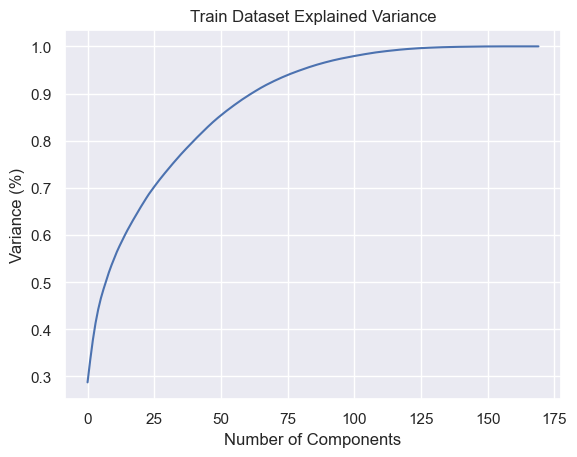

In [48]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Train Dataset Explained Variance")
plt.show()

The graph shows that to get 100% variance the minimum amount of components is 125 and to get the 


In this graph we can see that we can get 100% variance with 125 components, and something between 95% and 100% with 100 components. 

In [49]:
computed_covmat = pca.get_covariance()

print("comvat from PCA:")

print("{}".format(computed_covmat))

comvat from PCA:
[[ 1.00001667e+00  1.40856374e-02 -6.38774595e-02 ...  2.47153607e-01
   1.24087718e-02  2.43878095e-02]
 [ 1.40856374e-02  1.00001667e+00 -2.12835630e-03 ... -1.62475716e-02
   5.62720836e-02  1.06362225e-01]
 [-6.38774595e-02 -2.12835630e-03  1.00001667e+00 ...  1.37644263e-02
  -6.26212934e-03  1.47471475e-02]
 ...
 [ 2.47153607e-01 -1.62475716e-02  1.37644263e-02 ...  1.00001667e+00
  -3.43901873e-03 -9.71000041e-04]
 [ 1.24087718e-02  5.62720836e-02 -6.26212934e-03 ... -3.43901873e-03
   1.00001667e+00  2.82205226e-01]
 [ 2.43878095e-02  1.06362225e-01  1.47471475e-02 ... -9.71000041e-04
   2.82205226e-01  1.00001667e+00]]


This matrix shows the variance between the variables. However, as it was discussed before, it is difficult to analyse this due the amount of features of the dataset. The matrix and a heatmap could be useful for an analysis in a smaller dataset.

# APPLYING PCA

# FINISH THIS!!!!!!!!!!

The earlier steps 


In [50]:
pca = PCA(n_components = 100)

ca1_pca = pca.fit_transform(X_scaled)

i am passing my data frame in the pca algorithm so it can analise, and I do this with the data fram without the target variable.

X is all the features except the class

In [51]:
ca1_pca = pd.DataFrame(ca1_pca)

ca1_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.374500,-1.127649,-0.870419,1.728910,-0.061791,0.755184,0.397274,0.002818,-0.358145,-1.403681,...,-0.168761,0.186231,0.239044,-0.042037,-0.308524,-0.316809,0.135134,-0.188286,0.202988,0.358055
1,-0.615524,-0.550443,-0.035569,0.088882,-0.137166,0.109337,0.174648,-0.006077,0.139655,0.244997,...,-0.316581,-0.236234,-0.163780,-0.300013,0.219621,0.339465,0.202808,0.339560,0.068675,-0.040479
2,-1.205852,-0.059721,-0.771610,-0.500972,-0.038004,0.089637,-0.081018,-0.017044,-0.107396,0.156669,...,0.045232,0.010168,-0.043548,0.036007,0.010802,-0.051896,-0.060578,-0.022762,-0.007026,-0.061265
3,-3.188903,0.251461,-0.285778,-0.869549,0.327271,-0.241293,-0.238053,-0.020669,0.583821,1.030810,...,0.008391,0.018645,-0.004589,-0.002331,-0.015327,0.029916,0.037030,-0.046255,-0.040897,0.014206
4,0.323156,-0.064226,-0.612062,0.688140,-0.565306,0.215715,0.068443,0.007874,-0.514090,-1.137265,...,0.012048,0.230123,0.187012,0.047312,0.011617,-0.144835,-0.121988,0.214335,0.063791,-0.090129


In [52]:
ca1_concat = pd.concat([ca1_pca, y[["class"]]], axis = 1)

ca1_concat.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
0,2.374500,-1.127649,-0.870419,1.728910,-0.061791,0.755184,0.397274,0.002818,-0.358145,-1.403681,...,0.186231,0.239044,-0.042037,-0.308524,-0.316809,0.135134,-0.188286,0.202988,0.358055,0
1,-0.615524,-0.550443,-0.035569,0.088882,-0.137166,0.109337,0.174648,-0.006077,0.139655,0.244997,...,-0.236234,-0.163780,-0.300013,0.219621,0.339465,0.202808,0.339560,0.068675,-0.040479,0
2,-1.205852,-0.059721,-0.771610,-0.500972,-0.038004,0.089637,-0.081018,-0.017044,-0.107396,0.156669,...,0.010168,-0.043548,0.036007,0.010802,-0.051896,-0.060578,-0.022762,-0.007026,-0.061265,0
3,-3.188903,0.251461,-0.285778,-0.869549,0.327271,-0.241293,-0.238053,-0.020669,0.583821,1.030810,...,0.018645,-0.004589,-0.002331,-0.015327,0.029916,0.037030,-0.046255,-0.040897,0.014206,0
4,0.323156,-0.064226,-0.612062,0.688140,-0.565306,0.215715,0.068443,0.007874,-0.514090,-1.137265,...,0.230123,0.187012,0.047312,0.011617,-0.144835,-0.121988,0.214335,0.063791,-0.090129,0


# SPLITTING AND TRAINING OUR MODEL

In [53]:
ca1_array = ca1_concat.values

In [54]:
X = ca1_array[:,0:100]

y = ca1_array[:,100]

In [55]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [56]:
X

array([[ 2.37449964e+00, -1.12764948e+00, -8.70419279e-01, ...,
        -1.88286204e-01,  2.02988280e-01,  3.58054997e-01],
       [-6.15523996e-01, -5.50442567e-01, -3.55693909e-02, ...,
         3.39559898e-01,  6.86751175e-02, -4.04793860e-02],
       [-1.20585236e+00, -5.97210872e-02, -7.71610134e-01, ...,
        -2.27620950e-02, -7.02576602e-03, -6.12645230e-02],
       ...,
       [-3.20040141e+00,  1.66400834e-01, -4.14852751e-01, ...,
        -1.26721909e-02, -1.49156339e-01,  6.46722310e-02],
       [ 2.38351419e+00, -2.50409803e+00, -1.14449427e+00, ...,
        -1.01244596e+00,  5.93871926e-01,  1.57082743e+00],
       [-7.24923591e-01, -3.98952754e-01, -6.18277936e-01, ...,
        -7.54325662e-02, -3.22967687e-02, -3.15621978e-03]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

random_state create the random numbers to train the ML

# MODELS

Applying the models learnt in the Machine Learning Course

In [58]:
from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# SVM 

explain the model

In [59]:
from sklearn import svm

In [60]:
cls_svm = svm.SVC(kernel = "linear") 

cls_svm.fit(X_train, y_train)

y_pred_svm = cls_svm.predict(X_test)

print("accuracy:", metrics.accuracy_score(y_test, y_pred_svm))

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_svm)) )

print(classification_report(y_test, y_pred_svm))

y_predict = cls_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot = True)

# KNN MODEL

explain de model

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
kNN = KNeighborsClassifier(n_neighbors = 9)

kNN.fit(X_train, y_train)

y_pred_knn = kNN.predict(X_test)

print("accuracy:", metrics.accuracy_score(y_test, y_pred_knn))

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_knn)) )

print(classification_report(y_test, y_pred_knn))

y_pred_knn = kNN.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm, annot = True)

# DECISION TREE

In [63]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [64]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 0)

clf = clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_dt)) )

print(classification_report(y_test, y_pred_dt))

# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:

def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring = 'r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
    
    
    

In [67]:
lr = LinearRegression().fit(X_train, y_train)

In [68]:
get_cv_scores(lr)

CV Mean:  -43316.65479977268
STD:  129951.27125443237




In [69]:
print(lr.intercept_)
print(lr.coef_)

0.016437673001022276
[ 9.41412243e-03  2.64553709e-03  3.20868484e-03 -5.51908292e-03
 -4.06665955e-03 -7.48164708e-03  3.78320852e-03  6.72541311e-05
  1.41070497e-02 -1.30129068e-03 -9.10765908e-03 -8.43758390e-03
  3.95073019e-03  1.39702056e-03  9.67361902e-03 -8.87035234e-03
  4.54572656e-03  6.36208595e-03  1.03154397e-03  2.91065596e-04
 -4.38157319e-03 -9.94838394e-04 -1.71171192e-03  2.94009376e-03
  8.65148888e-03 -3.01009595e-04 -6.49521072e-03 -4.17013626e-03
 -5.85847391e-03  6.44033085e-03  3.45226727e-03  2.14745663e-03
  2.82013224e-03 -4.55207578e-04 -1.65385255e-03  6.73521715e-03
 -2.53494741e-03 -3.05340389e-03  4.59329425e-04  7.11796228e-04
 -5.08633374e-03  1.11223535e-03 -5.64484658e-03 -1.33230317e-03
 -3.36870314e-03 -4.62231684e-03  6.15770394e-03 -9.87445017e-03
  6.86996196e-04 -8.66980176e-03 -4.61756670e-04 -2.31072648e-03
 -3.82015512e-04 -7.35716028e-03  1.88378756e-03 -6.94571728e-03
  5.52008986e-03 -4.16700279e-03 -1.34485235e-02 -5.13040382e-03
 -5.

In [70]:
y_pred_lr = lr.predict(X_test)

In [71]:
linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
linear.head()

,Actual,Predicted
0,0.0,0.000826
1,0.0,-0.005463
2,0.0,-0.004628
3,0.0,-0.004764
4,0.0,-0.003659


In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 0.026190196752452228
Mean Squared Error: 0.008948514937295945
Root Mean Squared Error: 0.09459659051623344


# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


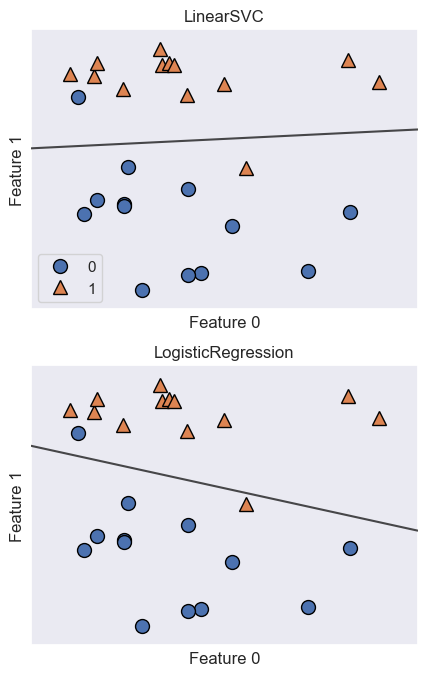

In [74]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(2, 1, figsize=(5, 8)) #first is the number of rows and the 2nd is the numbers
#of columns 
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

# Gaussian Naive Bayes and Support Vector Machine

## Gaussian Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

GaussianNB()

In [77]:
y_pred_gnb = nvclassifier.predict(X_test)

print(y_pred_gnb)

[0. 0. 0. ... 0. 0. 0.]


In [78]:
y_compare = np.vstack((y_test,y_pred_gnb)).T

y_compare[:30,:]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [79]:
score = accuracy_score(y_test, y_pred_gnb)
print(score)

0.9654166666666667


In [80]:
nvclassifier = GaussianNB()

cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 10).mean()

0.9333333333333332

In [81]:
print("Accuracy SVM:", metrics.accuracy_score(y_test, y_pred_svm))

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred_knn))

print("Accuracy DT:",metrics.accuracy_score(y_test, y_pred_dt))

print("Accuracy GNB:", accuracy_score(y_test, y_pred_gnb))

print("Accuracy GNB_CV:", cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 10).mean())

Accuracy SVM: 0.9906666666666667
Accuracy KNN: 0.98825
Accuracy DT: 0.9859166666666667
Accuracy GNB: 0.9654166666666667
Accuracy GNB_CV: 0.9333333333333332


# Dropping all the rows with missing values

- Accuracy SVM: 0.957983193277311

- Accuracy KNN: 0.957983193277311

- Accuracy DT: 0.8907563025210085

- Accuracy GNB: 0.8403361344537815

- Accuracy GNB_CV: 0.8103389830508474

# Dropping the columns with more than 50% of missing values

- Accuracy SVM: 0.9908333333333333

- Accuracy KNN: 0.9883333333333333

- Accuracy DT: 0.9866666666666667

- Accuracy GNB: 0.9651666666666666

- Accuracy GNB_CV: 0.9650166666666667